# Predicting Churn Rates of Telco Customers

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/kousukemaeda/Desktop/UCLA/Data Science/Winter 2019/Machine Learning Using RCOM SCI-X 450.4/Final Project/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Overview

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
len(data)

7043

## Data Preparation and Cleansing

### Transforming Qualitative to Quantitative Representations

In [5]:
data['gender'] = np.where(data['gender'] == 'Male', '1', '0')
data['Partner'] = np.where(data['Partner'] == 'Yes', '1', '0')
data['Dependents'] = np.where(data['Dependents'] == 'Yes', '1', '0')
data['PhoneService'] = np.where(data['PhoneService'] == 'Yes', '1', '0')
data['PaperlessBilling'] = np.where(data['PaperlessBilling'] == 'Yes', '1', '0')
data['Churn'] = np.where(data['Churn'] == 'Yes', '1', '0')

In [6]:
data.MultipleLines[data.MultipleLines == 'Yes'] = '1'
data.MultipleLines[data.MultipleLines == 'No'] = '0'
data.MultipleLines[data.MultipleLines == 'No phone service'] = '2'

data.InternetService[data.InternetService == 'DSL'] = '1'
data.InternetService[data.InternetService == 'No'] = '0'
data.InternetService[data.InternetService == 'Fiber optic'] = '2'

data.OnlineSecurity[data.OnlineSecurity == 'Yes'] = '1'
data.OnlineSecurity[data.OnlineSecurity == 'No'] = '0'
data.OnlineSecurity[data.OnlineSecurity == 'No internet service'] = '2'

data.OnlineBackup[data.OnlineBackup == 'Yes'] = '1'
data.OnlineBackup[data.OnlineBackup == 'No'] = '0'
data.OnlineBackup[data.OnlineBackup == 'No internet service'] = '2'

data.DeviceProtection[data.DeviceProtection == 'Yes'] = '1'
data.DeviceProtection[data.DeviceProtection == 'No'] = '0'
data.DeviceProtection[data.DeviceProtection == 'No internet service'] = '2'

data.TechSupport[data.TechSupport == 'Yes'] = '1'
data.TechSupport[data.TechSupport == 'No'] = '0'
data.TechSupport[data.TechSupport == 'No internet service'] = '2'

data.StreamingTV[data.StreamingTV == 'Yes'] = '1'
data.StreamingTV[data.StreamingTV == 'No'] = '0'
data.StreamingTV[data.StreamingTV == 'No internet service'] = '2'

data.StreamingMovies[data.StreamingMovies == 'Yes'] = '1'
data.StreamingMovies[data.StreamingMovies == 'No'] = '0'
data.StreamingMovies[data.StreamingMovies == 'No internet service'] = '2'

data.Contract[data.Contract == 'One year'] = '1'
data.Contract[data.Contract == 'Month-to-month'] = '0'
data.Contract[data.Contract == 'Two year'] = '2'

/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can 

### We will drop the column: PaymentMethod

In [7]:
data = data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']]
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,70.70,151.65,1


In [8]:
data.shape

(7043, 20)

### Switch the data type of TotalCharges from object to float, and SeniorCitizen from integer to object

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data['TotalCharges'] = data['TotalCharges'].convert_objects(convert_numeric=True)

/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
data['TotalCharges'].head(3)

0      29.85
1    1889.50
2     108.15
Name: TotalCharges, dtype: float64

In [12]:
data['MonthlyCharges'].head(3)

0    29.85
1    56.95
2    53.85
Name: MonthlyCharges, dtype: float64

In [13]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

In [14]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## EDA

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


In [16]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## Data Visualization

In [17]:
import matplotlib.pyplot as plt

In [18]:
data['gender'].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

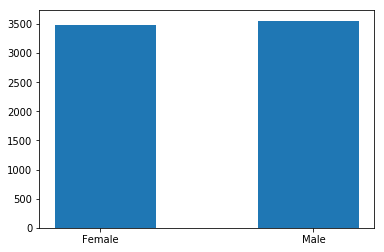

In [19]:
gender = (data['gender']).astype(int)

plt.hist(gender, bins = 3)
plt.xlabel = 'gender'
plt.ylabel = 'count'
plt.xticks([0.15,0.85],['Female','Male'])

plt.show()

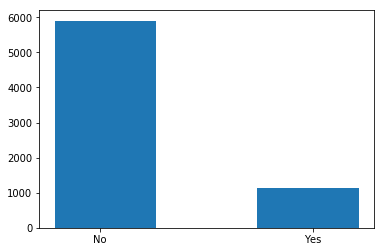

In [20]:
senior = (data['SeniorCitizen']).astype(int)

plt.hist(senior, bins = 3)
plt.xlabel = 'senior citizen'
plt.ylabel = 'count'
plt.xticks([0.15,0.85],['No','Yes'])

plt.show()

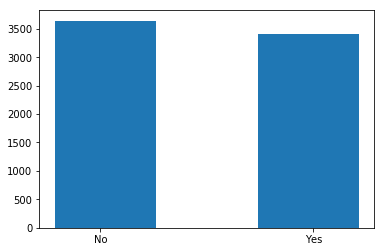

In [21]:
partner = (data['Partner']).astype(int)

plt.hist(partner, bins = 3)
plt.xlabel = 'partner'
plt.ylabel = 'count'
plt.xticks([0.15,0.85],['No','Yes'])

plt.show()

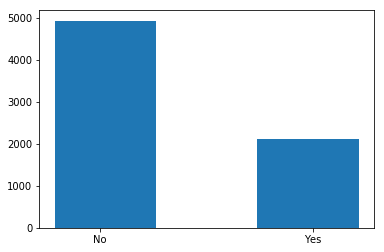

In [22]:
dependents = (data['Dependents']).astype(int)

plt.hist(dependents, bins = 3)
plt.xlabel = 'dependents'
plt.ylabel = 'count'
plt.xticks([0.15,0.85],['No','Yes'])

plt.show()

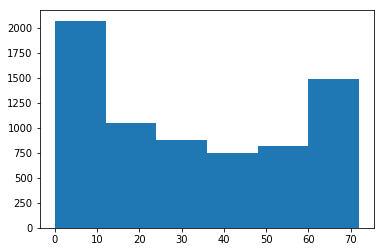

In [23]:
years = (data['tenure']).astype(int)

plt.hist(years, bins = 6)
plt.xlabel = 'years'
plt.ylabel = 'count'

plt.show()

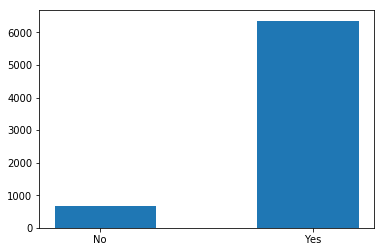

In [24]:
phoneservice = (data['PhoneService']).astype(int)

plt.hist(phoneservice, bins = 3)
plt.xlabel = 'phone service'
plt.ylabel = 'count'
plt.xticks([0.15,0.85],['No','Yes'])

plt.show()

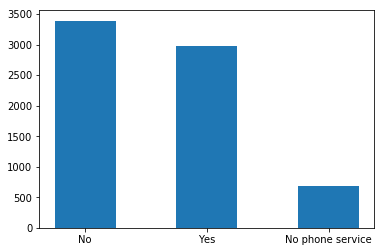

In [25]:
multiplelines = (data['MultipleLines']).astype(int)

plt.hist(multiplelines, bins = 5)
plt.xlabel = 'multiple lines'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','Yes', 'No phone service'])

plt.show()

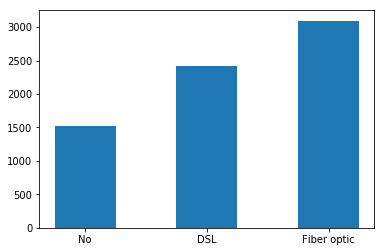

In [26]:
internetservice = (data['InternetService']).astype(int)

plt.hist(internetservice, bins = 5)
plt.xlabel = 'internet service'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','DSL', 'Fiber optic'])

plt.show()

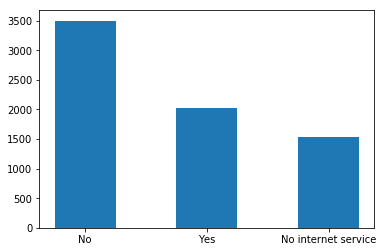

In [27]:
onlinesecurity = (data['OnlineSecurity']).astype(int)

plt.hist(onlinesecurity, bins = 5)
plt.xlabel = 'online security'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','Yes', 'No internet service'])

plt.show()

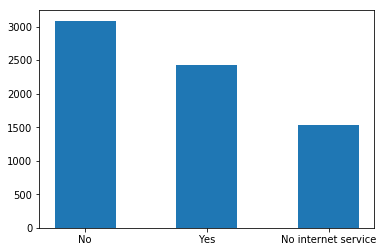

In [28]:
onlinebackup = (data['OnlineBackup']).astype(int)

plt.hist(onlinebackup, bins = 5)
plt.xlabel = 'online backup'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','Yes', 'No internet service'])

plt.show()

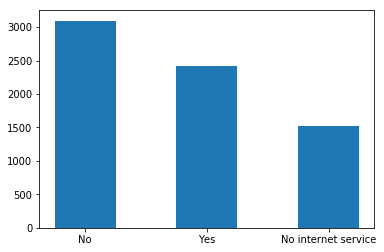

In [29]:
deviceprotection = (data['DeviceProtection']).astype(int)

plt.hist(deviceprotection, bins = 5)
plt.xlabel = 'device protection'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','Yes', 'No internet service'])

plt.show()

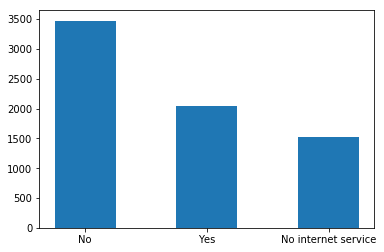

In [30]:
techsupport = (data['TechSupport']).astype(int)

plt.hist(techsupport, bins = 5)
plt.xlabel = 'tech support'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','Yes', 'No internet service'])

plt.show()

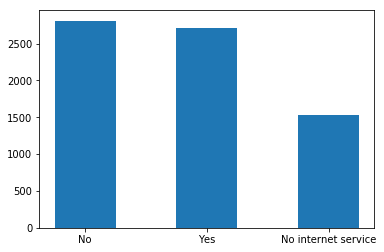

In [31]:
streamingtv = (data['StreamingTV']).astype(int)

plt.hist(streamingtv, bins = 5)
plt.xlabel = 'streaming tv'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','Yes', 'No internet service'])

plt.show()

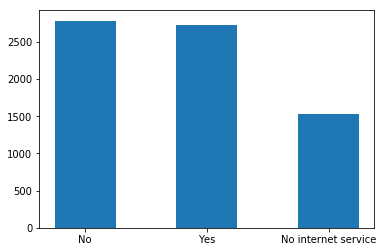

In [32]:
streamingmovies = (data['StreamingMovies']).astype(int)

plt.hist(streamingmovies, bins = 5)
plt.xlabel = 'streaming movies'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['No','Yes', 'No internet service'])

plt.show()

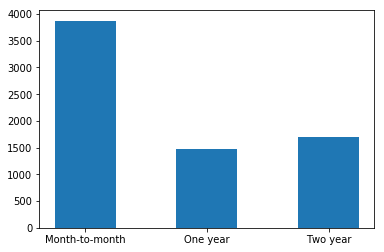

In [33]:
contract = (data['Contract']).astype(int)

plt.hist(contract, bins = 5)
plt.xlabel = 'contract'
plt.ylabel = 'count'
plt.xticks([0.2, 1, 1.8],['Month-to-month','One year', 'Two year'])

plt.show()

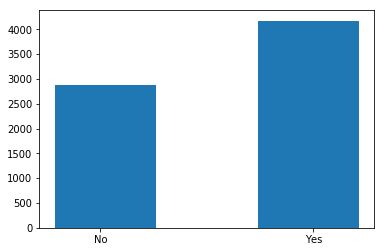

In [34]:
paperlessbilling = (data['PaperlessBilling']).astype(int)

plt.hist(paperlessbilling, bins = 3)
plt.xlabel = 'paperless billing'
plt.ylabel = 'count'
plt.xticks([0.15,0.85],['No','Yes'])

plt.show()

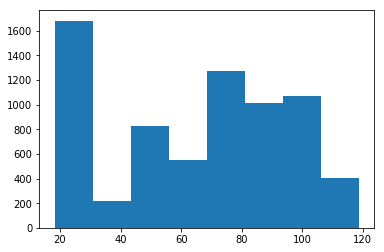

In [35]:
plt.hist(data['MonthlyCharges'], bins = 8)
plt.xlabel = 'monthly charge'
plt.ylabel = 'count'

plt.show()

/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


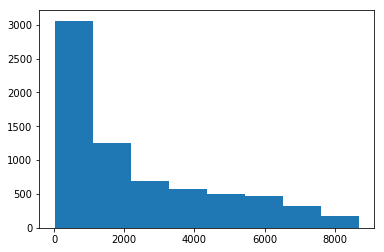

In [36]:
plt.hist(data['TotalCharges'], bins = 8)
plt.xlabel = 'total charge'
plt.ylabel = 'count'

plt.show()

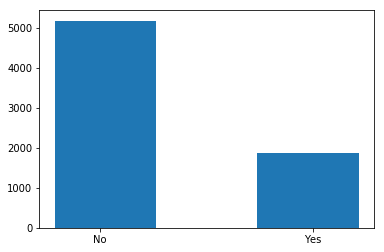

In [37]:
churn = (data['Churn']).astype(int)

plt.hist(churn, bins = 3)
plt.xlabel = 'churn'
plt.ylabel = 'count'
plt.xticks([0.15,0.85],['No','Yes'])

plt.show()

## Machine Learning

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x = data.values[:, 1:17]
y = data.values[:,-1]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
lr.score(x_train, y_train)

0.7971598134802883

In [43]:
y_pred = lr.predict(x_test)
lr.score(x_test, y_test)

0.8146236559139785

In [44]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1529  168]
 [ 263  365]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.90      0.88      1697
          1       0.68      0.58      0.63       628

avg / total       0.81      0.81      0.81      2325



In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8146236559139785


### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(random_state = 42)
clf1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [48]:
y_pred_train = clf1.predict(x_train)
y_pred_train

array(['0', '1', '0', ..., '0', '1', '0'], dtype=object)

In [49]:
data_confusion_train = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])
data_confusion_train

Predicted,0,1
Actual,,
0,3445,32
1,95,1146


In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy is ', accuracy_score(y_train,y_pred_train)*100)

Accuracy is  97.30818143281051


In [51]:
y_pred_test = clf1.predict(x_test)
y_pred_test

array(['0', '0', '0', ..., '1', '0', '1'], dtype=object)

In [52]:
data_confusion_test = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
data_confusion_test

Predicted,0,1
Actual,,
0,1354,343
1,314,314


In [53]:
print('Accuracy is ', accuracy_score(y_test,y_pred_test)*100)

Accuracy is  71.74193548387096


In [54]:
feature_imp1 = pd.Series(clf1.feature_importances_).sort_values(ascending=False)
feature_imp1

4     0.291209
14    0.179233
7     0.054032
0     0.051413
10    0.043742
6     0.042488
2     0.042446
9     0.041974
12    0.040535
15    0.039383
13    0.038027
8     0.034696
1     0.033577
3     0.032036
11    0.031795
5     0.003414
dtype: float64

### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=50, oob_score=True)
clf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [56]:
y_pred_train = clf2.predict(x_train)
y_pred_train

array(['0', '1', '0', ..., '0', '1', '0'], dtype=object)

In [57]:
data_confusion_train = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])
data_confusion_train

Predicted,0,1
Actual,,
0,3418,59
1,70,1171


In [58]:
print('Accuracy is ', accuracy_score(y_train,y_pred_train)*100)

Accuracy is  97.26579058923272


In [59]:
y_pred_test = clf2.predict(x_test)
y_pred_test

array(['1', '0', '0', ..., '1', '0', '0'], dtype=object)

In [60]:
data_confusion2 = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
data_confusion2

Predicted,0,1
Actual,,
0,1522,175
1,317,311


In [61]:
print('Accuracy is ', accuracy_score(y_test,y_pred_test)*100)

Accuracy is  78.83870967741935


In [62]:
feature_imp2 = pd.Series(clf2.feature_importances_).sort_values(ascending=False)
feature_imp2

4     0.361379
14    0.091752
8     0.053674
11    0.052543
7     0.051842
0     0.046161
6     0.041967
10    0.039642
2     0.038943
13    0.038792
9     0.038709
12    0.037710
15    0.037014
1     0.033098
3     0.029836
5     0.006939
dtype: float64

### Logistic Regression has the highest accuracy score